In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Loading the dataset
data = pd.read_csv('Stars_data.csv')

In [4]:
#Assigning input and output variables
X = data[['Temperature', 'A_M', 'R']]
y = data['Spectral_Class']

In [5]:
#Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Adjusting weightage of features after normalizing the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Assign weights to features
weightage = {'Temperature': 0.5, 'A_M': 0.3, 'R': 0.2}
weighted_X = X_scaled.copy()
for feature, weight in weightage.items():
    index = X.columns.get_loc(feature)
    weighted_X[:, index] *= weight

In [7]:
#AdaBoost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_clf.fit(weighted_X, y)

AdaBoostClassifier(random_state=42)

In [8]:
#Evaluation
y_pred = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.20833333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


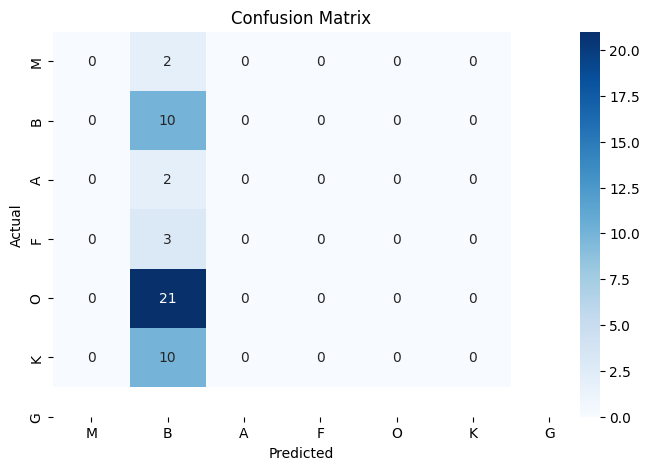

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['Spectral_Class'].unique(), yticklabels=data['Spectral_Class'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

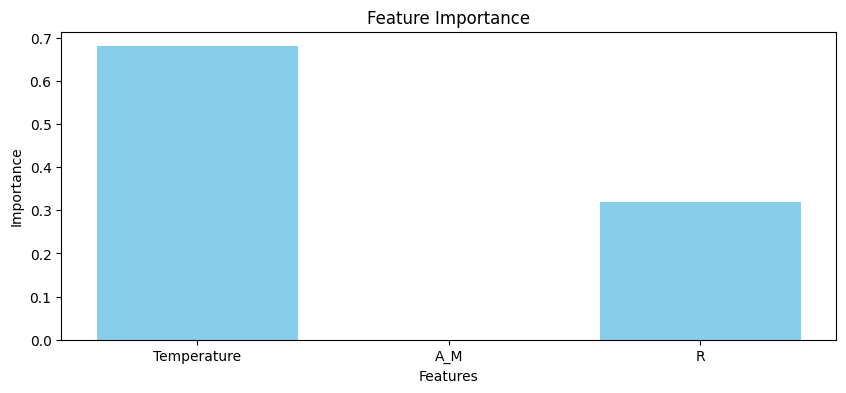

In [13]:
# Feature Importance Plot
feature_importance = adaboost_clf.feature_importances_
plt.figure(figsize=(10,4))
plt.bar(X.columns, feature_importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

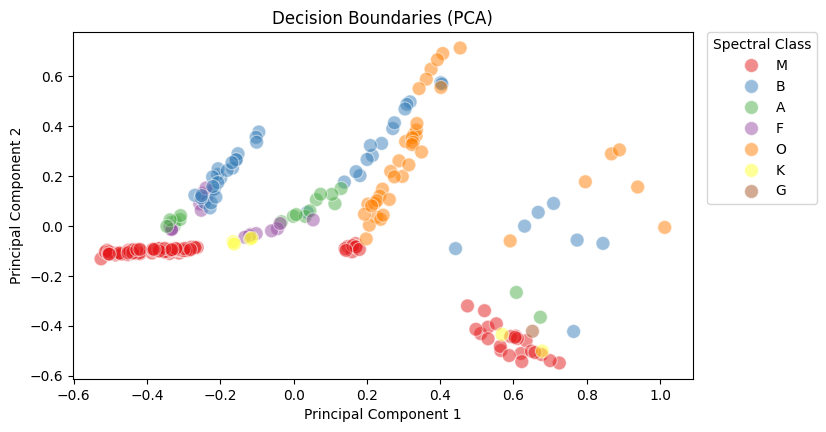

In [14]:
# Visualize Decision Boundaries using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 4.5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', s=100, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries (PCA)')
plt.legend(title='Spectral Class', loc='upper right', bbox_to_anchor=(1.2, 1), borderaxespad=0.)
plt.show()